In [1]:
library("plyr")
library(descr)
library("partykit")
library("tidyverse")
library("ggplot2")
data <- read.csv(file="../input/hvm.csv")

Loading required package: grid
Loading required package: libcoin
Loading required package: mvtnorm
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0       v purrr   0.3.0  
v tibble  2.0.1       v dplyr   0.8.0.1
v tidyr   0.8.2       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::arrange()   masks plyr::arrange()
x purrr::compact()   masks plyr::compact()
x dplyr::count()     masks plyr::count()
x dplyr::failwith()  masks plyr::failwith()
x dplyr::filter()    masks stats::filter()
x dplyr::id()        masks plyr::id()
x dplyr::lag()       masks stats::lag()
x dplyr::mutate()    masks plyr::mutate()
x dplyr::rename()    masks plyr::rename()
x dplyr::summarise() masks plyr::summarise()
x dplyr::summarize() masks plyr::summarize()


In [2]:
head(data)

age,gender,occupation,income,physical,mental,vacfreq,status,hshopping,hrecreation,hfood,hcharity,loan,food,savings,recreation,charity,shopping,heatlhcare,satisfaction
22,Female,Student,5,4,3,3,Single,5,5,4,4,1,3,4,4,2,5,4,3
21,Male,Student,4,4,5,4,In a relationship,1,5,5,1,2,4,3,4,1,1,2,5
20,Female,Student,2,3,3,2,In a relationship,2,5,3,5,1,3,2,4,2,2,5,4
21,Female,Student,1,3,3,1,Single,3,2,3,2,1,3,2,3,1,3,2,2
20,Male,Student,2,5,5,5,Single,2,3,3,3,1,4,4,2,3,2,4,5
20,Female,Student,2,4,4,1,Single,2,2,2,2,1,1,1,1,1,1,1,4


In [3]:
summary(data)

      age           gender         occupation      income         physical    
 Min.   :16.00   Female: 85   Home maker: 21   Min.   :1.000   Min.   :1.000  
 1st Qu.:20.00   Male  :122   Retired   :  6   1st Qu.:2.000   1st Qu.:3.000  
 Median :22.00                Student   :130   Median :2.000   Median :4.000  
 Mean   :25.91                Working   : 50   Mean   :2.493   Mean   :3.527  
 3rd Qu.:27.00                                 3rd Qu.:3.000   3rd Qu.:4.000  
 Max.   :84.00                                 Max.   :5.000   Max.   :5.000  
     mental         vacfreq                     status      hshopping   
 Min.   :1.000   Min.   : 0.000   In a relationship: 49   Min.   :1.00  
 1st Qu.:3.000   1st Qu.: 1.000   Married          : 51   1st Qu.:2.00  
 Median :4.000   Median : 2.000   Single           :105   Median :2.00  
 Mean   :3.729   Mean   : 2.387   Widow / Widower  :  2   Mean   :2.56  
 3rd Qu.:4.500   3rd Qu.: 3.000                           3rd Qu.:3.00  
 Max.   :

In [4]:
str(data)

'data.frame':	207 obs. of  20 variables:
 $ age         : int  22 21 20 21 20 20 25 20 21 24 ...
 $ gender      : Factor w/ 2 levels "Female","Male": 1 2 1 1 2 1 2 1 2 2 ...
 $ occupation  : Factor w/ 4 levels "Home maker","Retired",..: 3 3 3 3 3 3 4 3 4 4 ...
 $ income      : int  5 4 2 1 2 2 1 2 2 1 ...
 $ physical    : int  4 4 3 3 5 4 5 3 4 2 ...
 $ mental      : int  3 5 3 3 5 4 5 3 5 2 ...
 $ vacfreq     : num  3 4 2 1 5 1 4 3 3 1 ...
 $ status      : Factor w/ 4 levels "In a relationship",..: 3 1 1 3 3 3 3 3 3 3 ...
 $ hshopping   : int  5 1 2 3 2 2 4 1 4 1 ...
 $ hrecreation : int  5 5 5 2 3 2 4 1 3 1 ...
 $ hfood       : int  4 5 3 3 3 2 4 2 5 3 ...
 $ hcharity    : int  4 1 5 2 3 2 4 1 3 1 ...
 $ loan        : int  1 2 1 1 1 1 1 3 3 1 ...
 $ food        : int  3 4 3 3 4 1 4 1 5 3 ...
 $ savings     : int  4 3 2 2 4 1 2 2 5 3 ...
 $ recreation  : int  4 4 4 3 2 1 3 2 4 1 ...
 $ charity     : int  2 1 2 1 3 1 3 3 4 1 ...
 $ shopping    : int  5 1 2 3 2 1 4 2 5 1 ...
 $ heatlhca

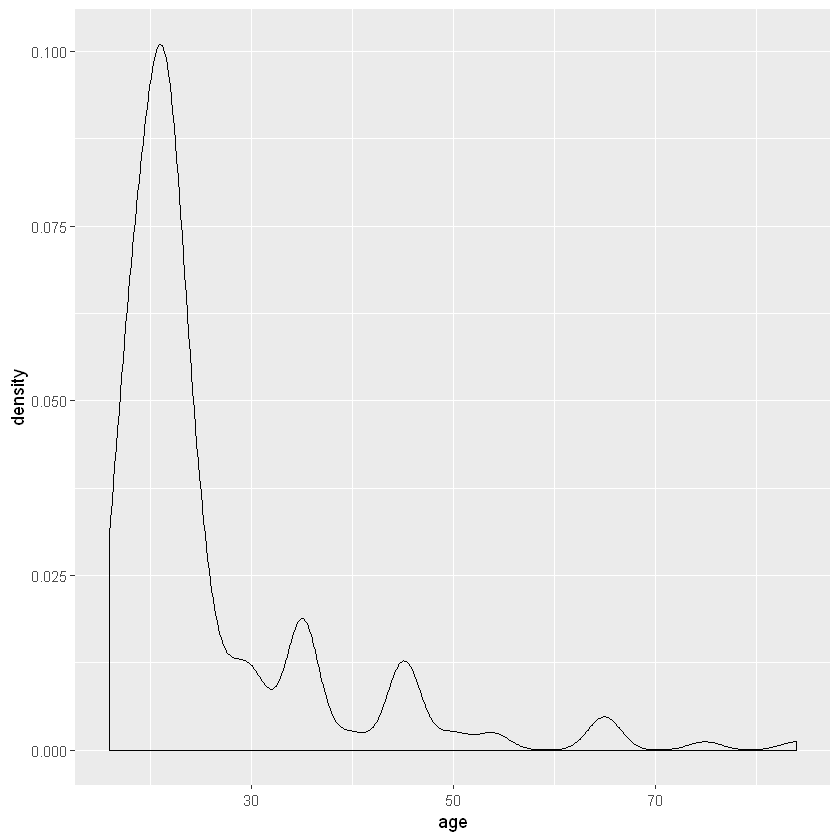

In [12]:
ggplot(data,aes(age))+
geom_density()

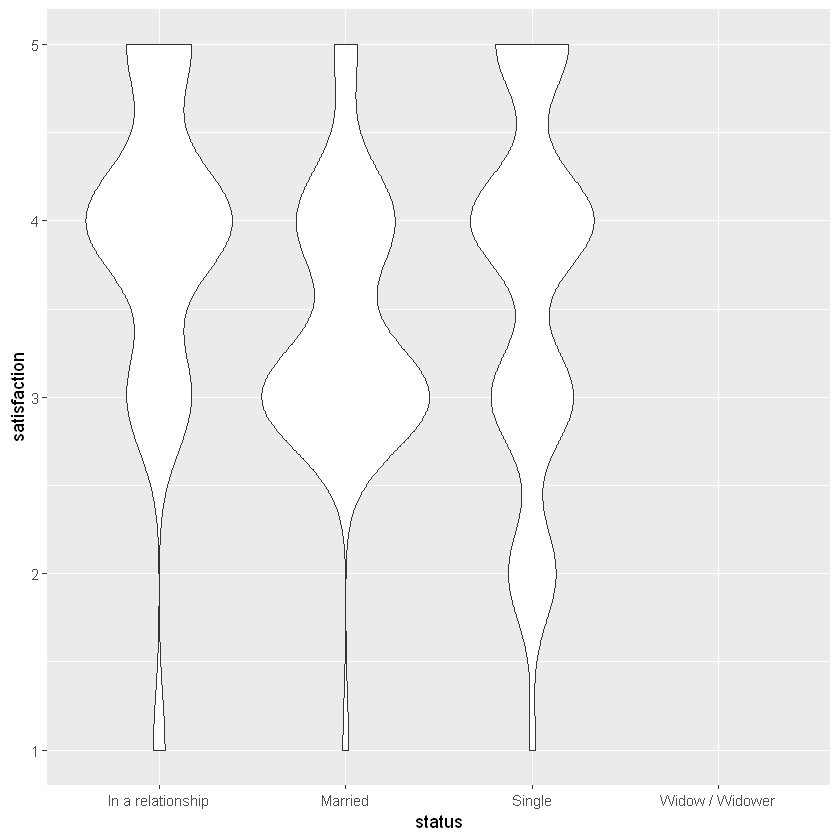

In [5]:
ggplot(data,aes(status  ,satisfaction))+
geom_violin()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


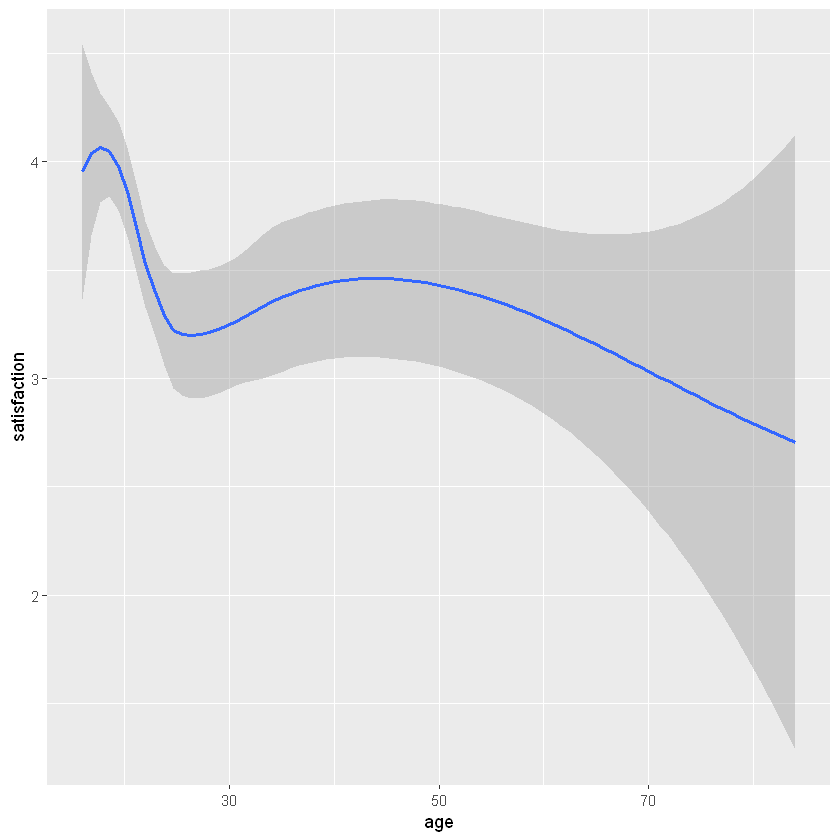

In [6]:
ggplot(data,aes(age  ,satisfaction))+
geom_smooth()

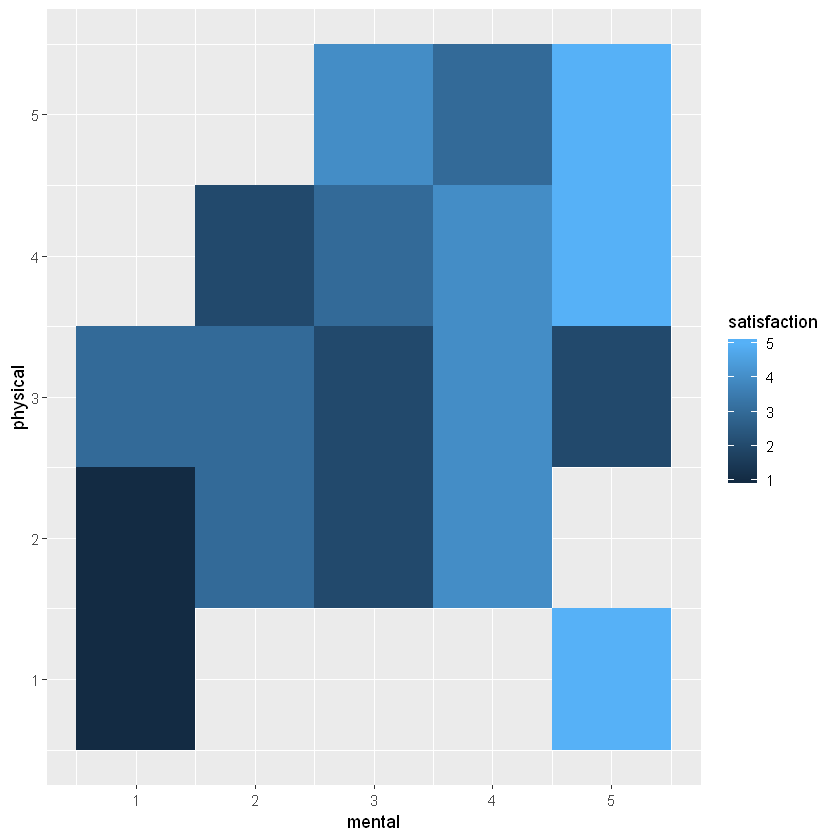

In [7]:
ggplot(data,aes(mental,physical))+
geom_tile(aes(fill=satisfaction))

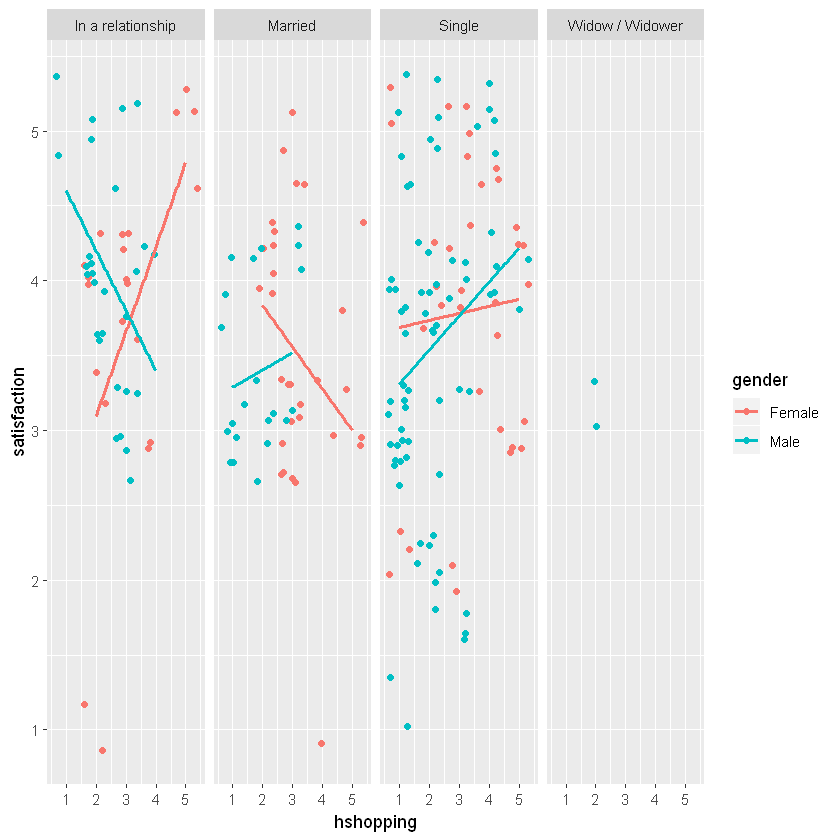

In [8]:
ggplot(data,aes(hshopping  ,satisfaction, color=gender))+
geom_jitter()+
geom_smooth(method = lm, se = FALSE)+
facet_grid(~status)

In [9]:
linearMod <- lm(age ~ satisfaction, data=data)
print(linearMod)
summary(linearMod)


Call:
lm(formula = age ~ satisfaction, data = data)

Coefficients:
 (Intercept)  satisfaction  
      34.393        -2.331  




Call:
lm(formula = age ~ satisfaction, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.731  -6.068  -3.400   1.432  58.932 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   34.3929     3.0385  11.319  < 2e-16 ***
satisfaction  -2.3311     0.8086  -2.883  0.00436 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.96 on 205 degrees of freedom
Multiple R-squared:  0.03896,	Adjusted R-squared:  0.03427 
F-statistic: 8.311 on 1 and 205 DF,  p-value: 0.00436


In [10]:
cor(data$age,data$satisfaction)

[1] -0.1973893